# House Prices - Advanced Regression Techniques

In [1]:
import pandas as pd
import numpy as np
import scipy 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Data Wrangling 

In [2]:
df = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
dropList = ['LotFrontage','Alley','FireplaceQu','PoolQC','Fence', 'MiscFeature']
df.drop(dropList, axis =1, inplace=True)
df_test.drop(dropList, axis =1, inplace=True)

In [5]:
df.loc[:,df.isnull().any()].dtypes

MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
dtype: object

In [6]:
df['MasVnrArea'].replace(np.nan, df['MasVnrArea'].mean() ,inplace=True)
df['GarageYrBlt'].replace(np.nan, df['GarageYrBlt'].mean(),inplace=True)

df_test['MasVnrArea'].replace(np.nan, df_test['MasVnrArea'].mean() ,inplace=True)
df_test['GarageYrBlt'].replace(np.nan, df_test['GarageYrBlt'].mean(),inplace=True)

In [7]:
#list(df.loc[:,df.isnull().any()])
objlist = ['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']

for x in objlist:
    df[x].replace(np.nan, 'othervalue', inplace=True)
    df_test[x].replace(np.nan, 'othervalue', inplace=True)

In [8]:
df.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,180.569112,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
df.describe(include=['object'])

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,...,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,5,2,4,4,2,5,3,25,9,8,...,6,4,7,7,4,6,6,3,9,6
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
freq,1151,1454,925,1311,1459,1052,1382,225,1260,1445,...,1334,735,1360,870,605,1311,1326,1340,1267,1198


In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   LotShape       1459 non-null   object 
 6   LandContour    1459 non-null   object 
 7   Utilities      1457 non-null   object 
 8   LotConfig      1459 non-null   object 
 9   LandSlope      1459 non-null   object 
 10  Neighborhood   1459 non-null   object 
 11  Condition1     1459 non-null   object 
 12  Condition2     1459 non-null   object 
 13  BldgType       1459 non-null   object 
 14  HouseStyle     1459 non-null   object 
 15  OverallQual    1459 non-null   int64  
 16  OverallCond    1459 non-null   int64  
 17  YearBuilt      1459 non-null   int64  
 18  YearRemo

In [11]:
df_test.loc[:,df_test.isnull().any()].dtypes

MSZoning         object
Utilities        object
Exterior1st      object
Exterior2nd      object
BsmtFinSF1      float64
BsmtFinSF2      float64
BsmtUnfSF       float64
TotalBsmtSF     float64
BsmtFullBath    float64
BsmtHalfBath    float64
KitchenQual      object
Functional       object
GarageCars      float64
GarageArea      float64
SaleType         object
dtype: object

In [12]:
floatlist = ['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath','GarageCars','GarageArea']
objlist = ['MSZoning','Utilities','Exterior1st','Exterior2nd','KitchenQual','Functional','SaleType']
for i in floatlist:
    df_test[i].replace(np.nan, df_test[i].mean() ,inplace=True)
    
for i in objlist:
    df_test[i].replace(np.nan, 'othervalue', inplace=True)


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler, PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error


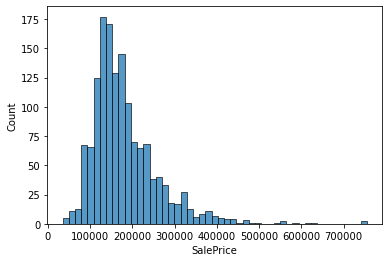

In [14]:
sns.histplot(data = df, x='SalePrice')

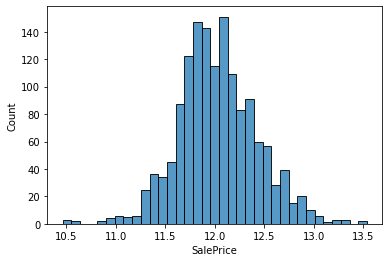

In [15]:
df['SalePrice'] = df['SalePrice'].apply(np.log1p)
sns.histplot(data = df, x='SalePrice')

In [16]:
#standerd scale on numColumns

num_cols = df.select_dtypes(['int','float']).columns.tolist()
num_cols.remove('SalePrice')
num_cols.remove('Id')
#df[num_cols].nunique()

s = StandardScaler()

df[num_cols] = s.fit_transform(df[num_cols])
df_test[num_cols] = s.fit_transform(df_test[num_cols])

df.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,...,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1460.000000
mean,730.500000,-8.455945e-17,-5.840077e-17,1.387018e-16,3.540547e-16,1.046347e-15,4.496860e-15,-3.406712e-17,-2.433366e-17,-3.406712e-17,...,5.596741e-17,3.041707e-17,-2.311697e-17,4.866731e-18,5.475072e-17,1.946692e-17,-2.676702e-17,7.543433e-17,3.567436e-14,12.024057
std,421.610009,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,...,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,0.399449
min,1.000000,-8.725628e-01,-9.237292e-01,-3.688413e+00,-4.112970e+00,-3.287824e+00,-1.689368e+00,-5.744105e-01,-9.730182e-01,-2.886528e-01,...,-7.521758e-01,-7.044833e-01,-3.593249e-01,-1.163393e-01,-2.702084e-01,-6.869175e-02,-8.768781e-02,-1.969111e+00,-1.367655e+00,10.460271
25%,365.750000,-8.725628e-01,-2.969908e-01,-7.951515e-01,-5.171998e-01,-5.719226e-01,-8.656586e-01,-5.744105e-01,-9.730182e-01,-2.886528e-01,...,-7.521758e-01,-7.044833e-01,-3.593249e-01,-1.163393e-01,-2.702084e-01,-6.869175e-02,-8.768781e-02,-4.891101e-01,-6.144386e-01,11.775105
50%,730.500000,-1.631095e-01,-1.040633e-01,-7.183611e-02,-5.171998e-01,5.737148e-02,4.425864e-01,-5.744105e-01,-1.319022e-01,-2.886528e-01,...,-7.521758e-01,-3.270298e-01,-3.593249e-01,-1.163393e-01,-2.702084e-01,-6.869175e-02,-8.768781e-02,-1.191097e-01,1.387775e-01,12.001512
75%,1095.250000,3.098594e-01,1.087080e-01,6.514792e-01,3.817427e-01,9.516316e-01,9.271216e-01,3.355252e-01,5.891327e-01,-2.886528e-01,...,5.886506e-01,3.221901e-01,-3.593249e-01,-1.163393e-01,-2.702084e-01,-6.869175e-02,-8.768781e-02,6.208910e-01,8.919936e-01,12.273736
max,1460.000000,3.147673e+00,2.051827e+01,2.821425e+00,3.078570e+00,1.282839e+00,1.217843e+00,8.289499e+00,1.140575e+01,8.851638e+00,...,6.087635e+00,7.554198e+00,8.675309e+00,1.721723e+01,8.341462e+00,1.830618e+01,3.116527e+01,2.100892e+00,1.645210e+00,13.534474


In [17]:
#one hot encode object type columns
cat_cols = df.columns[df.dtypes == np.object]
list1 = []
list2 = []
for x in cat_cols:
    for i in df[x].unique().tolist():
        list1.append("{}_{}".format(x,i))
        
for x in cat_cols:
    for i in df_test[x].unique().tolist():
        list2.append("{}_{}".format(x,i))



In [18]:
set(list1) ^ set(list2)


{'Condition2_RRAe',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'Electrical_Mix',
 'Electrical_othervalue',
 'Exterior1st_ImStucc',
 'Exterior1st_Stone',
 'Exterior1st_othervalue',
 'Exterior2nd_Other',
 'Exterior2nd_othervalue',
 'Functional_othervalue',
 'GarageQual_Ex',
 'Heating_Floor',
 'Heating_OthW',
 'HouseStyle_2.5Fin',
 'KitchenQual_othervalue',
 'MSZoning_othervalue',
 'RoofMatl_ClyTile',
 'RoofMatl_Membran',
 'RoofMatl_Metal',
 'RoofMatl_Roll',
 'SaleType_othervalue',
 'Utilities_NoSeWa',
 'Utilities_othervalue'}

In [19]:
dropcols = ['Condition2','Electrical','Exterior1st','Exterior2nd','Functional','GarageQual','Heating','HouseStyle','KitchenQual', 'MSZoning', 'RoofMatl','Utilities', 'SaleType']

In [20]:
df.drop(dropcols, axis =1, inplace=True)
df_test.drop(dropcols, axis =1, inplace=True)

In [21]:
cat_cols = df.columns[df.dtypes == np.object]
ohe_cols = (df[cat_cols].apply(lambda x: x.nunique()).sort_values(ascending=False))


In [22]:
ohe_cols

Neighborhood     25
Condition1        9
GarageType        7
BsmtFinType2      7
BsmtFinType1      7
Foundation        6
RoofStyle         6
GarageCond        6
SaleCondition     6
MasVnrType        5
ExterCond         5
BsmtQual          5
BsmtCond          5
BsmtExposure      5
BldgType          5
HeatingQC         5
LotConfig         5
ExterQual         4
LotShape          4
GarageFinish      4
LandContour       4
LandSlope         3
PavedDrive        3
CentralAir        2
Street            2
dtype: int64

In [23]:
le = LabelEncoder()
ohe = OneHotEncoder()


for col in ohe_cols.index:
    
    dat = le.fit_transform(df[col]).astype(np.int)
    df = df.drop(col, axis=1)
    new_dat = ohe.fit_transform(dat.reshape(-1,1))

    n_cols = new_dat.shape[1]
    col_names = ['_'.join([col, str(x)]) for x in range(n_cols)]

    new_df = pd.DataFrame(new_dat.toarray(), index=df.index, columns=col_names)
    df = pd.concat([df, new_df], axis=1)
    
for col in ohe_cols.index:
    
    dat = le.fit_transform(df_test[col]).astype(np.int)
    df_test = df_test.drop(col, axis=1)
    new_dat = ohe.fit_transform(dat.reshape(-1,1))

    n_cols = new_dat.shape[1]
    col_names = ['_'.join([col, str(x)]) for x in range(n_cols)]

    new_df = pd.DataFrame(new_dat.toarray(), index=df_test.index, columns=col_names)
    df_test = pd.concat([df_test, new_df], axis=1)
    


In [24]:
ycol = 'SalePrice'
xcol = [x for x in df.columns if x != 'SalePrice']


In [25]:
lr = LinearRegression()
lr.fit(df[xcol],df[ycol])
ypred = lr.predict(df_test[xcol])

In [26]:
ypred_restored = np.exp(ypred) - 1

In [29]:
odf = pd.DataFrame(df_test['Id'], columns=['Id'])
odf['SalePrice'] = pd.DataFrame(ypred_restored)
odf.set_index('Id',inplace=True)

In [31]:
odf

,SalePrice
Id,
1461,115094.506854
1462,145245.574259
1463,175452.499986
1464,197996.328227
1465,209646.383114
...,...
2915,81538.508114
2916,78243.142550
2917,161864.078135


In [33]:
odf.to_csv('out_df.csv')